## Data Science Capstone Project - Setting up a Greek Restaurant in Los Angeles

## <u>Motivation</u><a name="Motivation"></a>


<p style='text-align: justify;'> One of the busiest and popular cities in the world is Los Angeles, siutated in California,United States. It is the home of Hollywoodand like New York is one of the most diverse cultural hubs in the world. The city is also known for it's fine food and enormous opportunities it offers. </p>

<p style='text-align: justify;'>However, LA is also one of the most expensive places in the world to live in. As a business opportunity it is relevant to be able to see where Los Angeles's most expensive areas are and if were to place a Greek restaurant, where the prime location would be. </p>
<p> </p>
<div style='text-align: justify;'>The main goal of this project is to identify the restaurant demographics of Los Angeles and compare it with the rental prices around the area. This will give us two possibilities, either we target an expensive neighborhood for a high end Greek Restaurant or a mid-size affordable restaurant in an area where rent is relatively cheaper. The reason I have chosen a Greek is to further introduce the cuisine in the city.</b>. </div>

<p style='text-align: justify;'>Since there are lots of restaurants in LA, neighbourhoods that are <b>not already crowded with restaurants</b> would be shortlisted. The next filter would be neighbourhoods with the <b>least number of Greek restaurants in its vicinity</b>.</p>

## <u>Data</u> <a name="data"></a>

For this project, we will be focusing on the following data factors:
* Number of existing Greek restaurants in the neighbourhood (any type of restaurant) 
* Number of and distance to Greek restaurants in the neighbourhood
* Distance of neighbourhood from city center
* Average neighbourhood rent

The following data sources will be needed to extract/generate the required information: -
* List of all neighbourhoods in LA - https://en.wikipedia.org/wiki/List_of_districts_and_neighbourhoods_of_Los_Angeles
* Coordinates of all neighbourhoods and venues - ***GeoPy Nominatim geocoding***
* Number of restaurants and their type and location in every neighbourhood - ***Foursquare API*** -  https://developer.foursquare.com
* LA rent data - https://www.rentcafe.com/average-rent-market-trends/us/ca/los-angeles/


### Libraries <a name="import"></a>

Importing the required libraries.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas data frame

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

from bs4 import BeautifulSoup

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [2]:
!pip install --upgrade pyOpenSSL

Requirement already up-to-date: pyOpenSSL in /Users/shayanriyaz/opt/anaconda3/lib/python3.7/site-packages (19.1.0)


In [3]:
import re

[Back to top of Analysis](#analysis)

### Web Scraping Neighbourhood Data <a name="scrapenh"></a>

The list of all neighbourhoods in LA is obtained by scraping the relevant webpage.
**https://en.wikipedia.org/wiki/List_of_districts_and_neighbourhoods_of_Los_Angeles** 

**Note: The data in the webpage is in the form of a list and not a table. Therefore, the data is obtained by searching for all list items and then using a particular characteristic that groups the required items.**

In [4]:
url = requests.get('https://en.wikipedia.org/wiki/List_of_districts_and_neighbourhoods_of_Los_Angeles').text
soup = BeautifulSoup(url,"html.parser")

In [5]:
lis = []
for li in soup.findAll('li'):
    if li.find(href="/wiki/Portal:Los_Angeles"):
        break
    if li.find(href=re.compile("^/wiki/")):
        lis.append(li)
    if li.text=='Pico Robertson[34]': #Pico Robertson is the only item on the list that does not have a hyperlink reference
        lis.append(li)


[Back to top of Analysis](#analysis)

### Loading and Cleaning Neighbourhood [Data Wrangling] 

In [6]:
neigh = []
for i in range(0,len(lis)):
    neigh.append(lis[i].text.strip())
    
df = pd.DataFrame(neigh)
df.columns = ['Neighbourhood']

In [7]:
df

Neighbourhood
0                            Angelino Heights[TG]
1                                    Angeles Mesa
2                                   Angelus Vista
3                                 Arleta[MLA][TG]
4                          Arlington Heights[MLA]
5                                Arts District[1]
6                            Atwater Village[MLA]
7                               Baldwin Hills[TG]
8                     Baldwin Hills/Crenshaw[MLA]
9                             Baldwin Village[TG]
10                               Baldwin Vista[2]
11                            Beachwood Canyon[3]
12   Bel Air, Bel-Air or Bel Air Estates[MLA][TG]
13                             Benedict Canyon[4]
14                             Beverly Crest[MLA]
15                               Beverly Glen[TG]
16                             Beverly Grove[MLA]
17                   Beverly Hills Post Office[5]
18                                Beverly Park[6]
19                               Beverlywood[MLA]
20                         Boyle Heights[MLA][TG]
21                             Brentwood[MLA][TG]
22                            Brentwood Circle[7]
23                              Brentwood Glen[8]
24                       Broadway-Manchester[MLA]
25                                      Brookside
26                                 Bunker Hill[1]
27                              Cahuenga Pass[TG]
28                           Canoga Park[MLA][TG]
29                           Canterbury Knolls[9]
30                                   Carthay[MLA]
31                                 Castle Heights
32                           Central-Alameda[MLA]
33                               Central City[TG]
34                          Century City[MLA][TG]
35                            Chatsworth[MLA][TG]
36                   Chesterfield Square[MLA][TG]
37                         Cheviot Hills[MLA][TG]
38                             Chinatown[MLA][TG]
39                               Civic Center[10]
40                                   Crenshaw[TG]
41                            Crestwood Hills[11]
42                          Cypress Park[MLA][TG]
43                               Del Rey[MLA][TG]
44                                  Downtown[MLA]
45                            Eagle Rock[TG][MLA]
46             East Gate Bel Air[citation needed]
47                            East Hollywood[MLA]
48                             Echo Park[MLA][TG]
49                                   Edendale[12]
50                             El Sereno[MLA][TG]
51                            Elysian Heights[13]
52                              Elysian Park[MLA]
53                            Elysian Valley[MLA]
54                                Encino[MLA][TG]
55                       Exposition Park[MLA][TG]
56                         Faircrest Heights [14]
57                                   Fairfax[MLA]
58                            Fashion District[1]
59                     Filipinotown, Historic[15]
60                          Financial District[1]
61                              Florence[MLA][TG]
62                            Flower District[16]
63                             Franklin Hills[17]
64                                 Gallery Row[1]
65                                   Garvanza[TG]
66                         Glassell Park[MLA][TG]
67                             Gramercy Park[MLA]
68                         Granada Hills[MLA][TG]
69                             Green Meadows[MLA]
70                             Griffith Park[MLA]
71                          Hancock Park[MLA][TG]
72                           Harbor City[MLA][TG]
73                        Harbor Gateway[MLA][TG]
74                       Harvard Heights[MLA][TG]
75                              Harvard Park[MLA]
76                                     Hermon[TG]
77                         Highland Park[MLA][TG]
78                               Historic Core[1]
79                             Holly

In [8]:
df['Neighbourhood'] = df.Neighbourhood.str.partition('[')[0] #Removes the citation and reference brackets
df['Neighbourhood'] = df.Neighbourhood.str.partition(',')[0] #Removes the alternatives for 'Bel Air'
df=df[df.Neighbourhood!='Baldwin Hills/Crenshaw'] #Removes redundancy as 'Baldwin Hills' and 'Crenshaw' exist already
df=df[df.Neighbourhood!='Hollywood Hills West'] #Removes redundancy as it has the same coordinates as 'Hollywood Hills'
df=df[df.Neighbourhood!='Brentwood Circle'] #Removes redundancy as it has the same coordinates as 'Brentwood'
df=df[df.Neighbourhood!='Wilshire Park'] #Removes redundancy as it has the same coordinates as 'Wilshire Center'
df.reset_index(inplace=True,drop=True)

### Obtaining Neighbourhood Coordinates  

In [9]:
# define the data frame columns
column_names = ['Neighbourhood', 'Latitude', 'Longitude'] 

# instantiate the data frame
nhoods = pd.DataFrame(columns=column_names)

Using GeoPy Nominatim geolocator with the user_agent "la_explorer".

In [10]:
geolocator = Nominatim(user_agent="la_explorer",timeout=5)
for i in range(0,len(df)):
    
    address = df.Neighbourhood[i]+', Los Angeles'
    location = geolocator.geocode(address)
    if location == None:
        latitude = 0
        longitude = 0
    else:
        latitude = location.latitude
        longitude = location.longitude

    nhoods = nhoods.append({'Neighbourhood': df.Neighbourhood[i],
                                              'Latitude': latitude,
                                              'Longitude': longitude}, ignore_index=True)

Clean neighbourhood data with the respective coordinates: 

In [11]:
nhoods

Neighbourhood   Latitude   Longitude
0             Angelino Heights  34.070289 -118.254796
1                 Angeles Mesa  33.991402 -118.319520
2                Angelus Vista   0.000000    0.000000
3                       Arleta  34.241327 -118.432205
4            Arlington Heights  34.043494 -118.321374
5                Arts District  34.041239 -118.234450
6              Atwater Village  34.118698 -118.262392
7                Baldwin Hills  34.010989 -118.337071
8              Baldwin Village  34.019456 -118.345910
9                Baldwin Vista   0.000000    0.000000
10            Beachwood Canyon  34.122292 -118.321384
11                     Bel Air  34.098883 -118.459881
12             Benedict Canyon  34.044770 -118.400022
13               Beverly Crest  34.116770 -118.432261
14                Beverly Glen  34.107785 -118.445636
15               Beverly Grove  34.076034 -118.369972
16   Beverly Hills Post Office  34.069650 -118.396306
17                Beverly Park  34.063769 -118.264690
18                 Beverlywood  34.046633 -118.395038
19               Boyle Heights  34.043689 -118.209768
20                   Brentwood  34.052140 -118.474070
21              Brentwood Glen   0.000000    0.000000
22         Broadway-Manchester  33.941015 -118.274404
23                   Brookside  14.587560  121.124733
24                 Bunker Hill  34.055066 -118.251223
25               Cahuenga Pass  34.096867 -118.329508
26                 Canoga Park  34.201078 -118.597826
27           Canterbury Knolls  33.842760 -118.129731
28                     Carthay  34.061121 -118.367300
29              Castle Heights   0.000000    0.000000
30             Central-Alameda  34.004015 -118.247784
31                Central City  34.053691 -118.242767
32                Century City  34.057426 -118.414727
33                  Chatsworth  34.259571 -118.602325
34         Chesterfield Square  33.983474 -118.313651
35               Cheviot Hills  34.040588 -118.409887
36                   Chinatown  34.063840 -118.235868
37                Civic Center  34.057561 -118.246810
38                    Crenshaw  33.925212 -118.326530
39             Crestwood Hills  34.076675 -118.488970
40                Cypress Park  34.092232 -118.224518
41                     Del Rey  33.989653 -118.424344
42                    Downtown  34.042849 -118.247673
43                  Eagle Rock  34.136688 -118.207680
44           East Gate Bel Air   0.000000    0.000000
45              East Hollywood  34.090428 -118.296625
46                   Echo Park  34.077982 -118.256782
47                    Edendale  34.107516 -118.265949
48                   El Sereno  34.081121 -118.177849
49             Elysian Heights  34.099548 -118.244715
50                Elysian Park  34.077434 -118.238620
51              Elysian Valley  34.095913 -118.242033
52                      Encino  34.159132 -118.501617
53             Exposition Park  34.013654 -118.287211
54          Faircrest Heights    0.000000    0.000000
55                     Fairfax  34.079155 -118.352284
56            Fashion District  34.036622 -118.259069
57                Filipinotown   0.000000    0.000000
58          Financial District  34.050248 -118.255775
59                    Florence  33.974159 -118.243286
60             Flower District  34.040964 -118.249397
61              Franklin Hills  14.587560  121.124733
62                 Gallery Row  34.046687 -118.249490
63                    Garvanza  34.119578 -118.180626
64               Glassell Park  34.116120 -118.228963
65               Gramercy Park  33.951194 -118.309327
66               Granada Hills  34.266156 -118.517434
67               Green Meadows  33.940988 -118.262997
68               Griffith Park  34.135814 -118.294789
69                Hancock Park  34.073678 -118.335055
70                 Harbor City  33.797282 -118.300472
71              Harbor Gateway  33.854225 -118.299220
72             Harvard Heights  34.047111 -118.305483
73                Har

Deleting neighbourhoods with missing (zero) values and obvious geocoding errors: -


In [12]:

nhoods['Latitude']=nhoods['Latitude'].astype(float)
nhoods['Longitude']=nhoods['Longitude'].astype(float)

nhoods=nhoods[(nhoods.Latitude>33.5) & (nhoods.Latitude<34.4) & (nhoods.Longitude<-118)] 
nhoods.reset_index(inplace=True,drop=True)

Complete neighbourhood data frame: -

In [13]:
nhoods

Neighbourhood   Latitude   Longitude
0             Angelino Heights  34.070289 -118.254796
1                 Angeles Mesa  33.991402 -118.319520
2                       Arleta  34.241327 -118.432205
3            Arlington Heights  34.043494 -118.321374
4                Arts District  34.041239 -118.234450
5              Atwater Village  34.118698 -118.262392
6                Baldwin Hills  34.010989 -118.337071
7              Baldwin Village  34.019456 -118.345910
8             Beachwood Canyon  34.122292 -118.321384
9                      Bel Air  34.098883 -118.459881
10             Benedict Canyon  34.044770 -118.400022
11               Beverly Crest  34.116770 -118.432261
12                Beverly Glen  34.107785 -118.445636
13               Beverly Grove  34.076034 -118.369972
14   Beverly Hills Post Office  34.069650 -118.396306
15                Beverly Park  34.063769 -118.264690
16                 Beverlywood  34.046633 -118.395038
17               Boyle Heights  34.043689 -118.209768
18                   Brentwood  34.052140 -118.474070
19         Broadway-Manchester  33.941015 -118.274404
20                 Bunker Hill  34.055066 -118.251223
21               Cahuenga Pass  34.096867 -118.329508
22                 Canoga Park  34.201078 -118.597826
23           Canterbury Knolls  33.842760 -118.129731
24                     Carthay  34.061121 -118.367300
25             Central-Alameda  34.004015 -118.247784
26                Central City  34.053691 -118.242767
27                Century City  34.057426 -118.414727
28                  Chatsworth  34.259571 -118.602325
29         Chesterfield Square  33.983474 -118.313651
30               Cheviot Hills  34.040588 -118.409887
31                   Chinatown  34.063840 -118.235868
32                Civic Center  34.057561 -118.246810
33                    Crenshaw  33.925212 -118.326530
34             Crestwood Hills  34.076675 -118.488970
35                Cypress Park  34.092232 -118.224518
36                     Del Rey  33.989653 -118.424344
37                    Downtown  34.042849 -118.247673
38                  Eagle Rock  34.136688 -118.207680
39              East Hollywood  34.090428 -118.296625
40                   Echo Park  34.077982 -118.256782
41                    Edendale  34.107516 -118.265949
42                   El Sereno  34.081121 -118.177849
43             Elysian Heights  34.099548 -118.244715
44                Elysian Park  34.077434 -118.238620
45              Elysian Valley  34.095913 -118.242033
46                      Encino  34.159132 -118.501617
47             Exposition Park  34.013654 -118.287211
48                     Fairfax  34.079155 -118.352284
49            Fashion District  34.036622 -118.259069
50          Financial District  34.050248 -118.255775
51                    Florence  33.974159 -118.243286
52             Flower District  34.040964 -118.249397
53                 Gallery Row  34.046687 -118.249490
54                    Garvanza  34.119578 -118.180626
55               Glassell Park  34.116120 -118.228963
56               Gramercy Park  33.951194 -118.309327
57               Granada Hills  34.266156 -118.517434
58               Green Meadows  33.940988 -118.262997
59               Griffith Park  34.135814 -118.294789
60                Hancock Park  34.073678 -118.335055
61                 Harbor City  33.797282 -118.300472
62              Harbor Gateway  33.854225 -118.299220
63             Harvard Heights  34.047111 -118.305483
64                Harvard Park  33.983947 -118.304623
65                      Hermon  34.107314 -118.185251
66               Highland Park  34.109947 -118.196983
67               Historic Core  34.045962 -118.251874
68                   Hollywood  34.098003 -118.329523
69             Hollywood Hills  34.131179 -118.335547
70                   Hyde Park  33.985402 -118.330861
71              Jefferson Park  34.029617 -118.322460
72            Jewelry District  34.046206 -118.254167
73                   

### Los Angeles Neighbourhood Map <a name="lamap"></a>

In [14]:
address = 'Los Angeles, USA'

geolocator = Nominatim(user_agent="la_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of {} are {}, {}.'.format(address,latitude, longitude))

The geograpical coordinates of Los Angeles, USA are 34.0536909, -118.2427666.


Creating a map of LA with neighbourhoods superimposed on top: -

In [15]:
# create map of LA using latitude and longitude values
map_la = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighbourhood in zip(nhoods['Latitude'], nhoods['Longitude'], nhoods['Neighbourhood']):
    label = '{}'.format(neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3199cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_la)  
    
map_la

### Defining Foursquare Credentials and Version   <a name="foursquare"></a>

In [16]:
CLIENT_ID = 'TFRCBBAXM4COSHE03IRQFXCWG2N3XXHLZJANEXIGAVUHQBAR' # Foursquare ID
CLIENT_SECRET = 'WCSRAQ4RSOY103ONN33LDUMKDGTJFQUJRYEYTBSYGF1U0AGW' # Foursquare Secret
VERSION = '20200228' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET: ' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: TFRCBBAXM4COSHE03IRQFXCWG2N3XXHLZJANEXIGAVUHQBAR
CLIENT_SECRET: WCSRAQ4RSOY103ONN33LDUMKDGTJFQUJRYEYTBSYGF1U0AGW


### Exploring the first Neighbourhood <a name="first"></a>

In [17]:
neighbourhood_latitude = nhoods.loc[0, 'Latitude'] # neighbourhood latitude value
neighbourhood_longitude = nhoods.loc[0, 'Longitude'] # neighbourhood longitude value

neighbourhood_name = nhoods.loc[0, 'Neighbourhood'] # neighbourhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighbourhood_name, 
                                                               neighbourhood_latitude, 
                                                               neighbourhood_longitude))

Latitude and longitude values of Angelino Heights are 34.0702889, -118.2547965.


In [18]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighbourhood_latitude, 
    neighbourhood_longitude, 
    radius, 
    LIMIT)

Venue data: -

In [19]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ea3c8e81a4b0a7462688aa0'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'East LA',
  'headerFullLocation': 'East LA, Los Angeles',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 24,
  'suggestedBounds': {'ne': {'lat': 34.074788904500004,
    'lng': -118.24937415757756},
   'sw': {'lat': 34.0657888955, 'lng': -118.26021884242243}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4f75a626e5e8f16c87566797',
       'name': 'Halliwell Manor',
       'location': {'address': '1329 Carroll Ave',
        'lat': 34.069328534140894,
        'lng': -118.25416524263122,
        'labeledLatLngs': [{

In [20]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Nearby venues of the first neighbourhood: -

In [21]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

name             categories  \
0                                 Halliwell Manor  Performing Arts Venue   
1                                Eightfold Coffee            Coffee Shop   
2                                        Guisados             Taco Place   
3   Michael Jackson's "Thriller" House (and Tree)          Historic Site   
4                                         Tsubaki    Japanese Restaurant   
5                                           Ototo               Sake Bar   
6                             Subliminal Projects            Art Gallery   
7                                       Bar Henry           Cocktail Bar   
8                           The Park's Finest BBQ              BBQ Joint   
9                                    Bob's Market      Convenience Store   
10                            The Park Restaurant         Breakfast Spot   
11                                       K Bakery                 Bakery   
12                                       Guisados             Taco Place   
13                                 Domino's Pizza            Pizza Place   
14                                        Super 8                  Motel   
15                                    Knights Inn                  Hotel   
16                                   Lento Market                 Market   
17                         Blood is the New Black         Clothing Store   
18                                 Tuesday Bassen               Boutique   
19                                    Marion Park                   Park   
20                                      ESQUELETO          Jewelry Store   
21                                Sunset Sidewalk                  Trail   
22                                     Leo Market          Grocery Store   
23                           Sunset Tropical Fish              Pet Store   

          lat         lng  
0   34.069329 -118.254165  
1   34.071245 -118.250698  
2   34.070262 -118.250437  
3   34.069557 -118.254599  
4   34.072938 -118.251298  
5   34.074399 -118.254016  
6   34.072290 -118.250737  
7   34.069062 -118.250465  
8   34.066519 -118.254291  
9   34.067812 -118.251939  
10  34.074243 -118.252242  
11  34.066124 -118.254059  
12  34.071178 -118.250273  
13  34.073528 -118.251187  
14  34.072722 -118.250899  
15  34.066201 -118.253954  
16  34.070979 -118.250862  
17  34.070938 -118.250793  
18  34.071099 -118.250782  
19  34.067817 -118.251455  
20  34.072412 -118.250786  
21  34.072931 -118.251184  
22  34.073945 -118.252091  
23  34.073475 -118.251195

### Exploring all Neighbourhoods  <a name="all"></a>

Function to get the nearby venues of all neighbourhoods and load the data into a data frame: -

In [22]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [23]:
la_venues = getNearbyVenues(names=nhoods['Neighbourhood'],
                                   latitudes=nhoods['Latitude'],
                                   longitudes=nhoods['Longitude']
                                  )

Data frame of all venues: -

In [24]:
print(la_venues.shape)
la_venues.head()

(3743, 7)


Neighbourhood  Neighbourhood Latitude  Neighbourhood Longitude  \
0  Angelino Heights               34.070289              -118.254796   
1  Angelino Heights               34.070289              -118.254796   
2  Angelino Heights               34.070289              -118.254796   
3  Angelino Heights               34.070289              -118.254796   
4  Angelino Heights               34.070289              -118.254796   

                                           Venue  Venue Latitude  \
0                                Halliwell Manor       34.069329   
1                               Eightfold Coffee       34.071245   
2                                       Guisados       34.070262   
3  Michael Jackson's "Thriller" House (and Tree)       34.069557   
4                                        Tsubaki       34.072938   

   Venue Longitude         Venue Category  
0      -118.254165  Performing Arts Venue  
1      -118.250698            Coffee Shop  
2      -118.250437             Taco Place  
3      -118.254599          Historic Site  
4      -118.251298    Japanese Restaurant

In [25]:
la_venues_count=la_venues.groupby('Neighbourhood').count()
la_venues_count.drop(la_venues_count.columns[[0,1,3,4,5]], axis=1,inplace=True)

In [26]:
la_venues_count.reset_index(inplace=True)

It makes sense to set up a restaurant in one of the more popular neighbourhoods so that the restaurant attracts the attention of a lot more people.

Therefore, a list of all the popular neighbourhoods i.e. the neighbourhoods with 10 or more venues is obtained: -

In [27]:
pop_neigh=la_venues_count[(la_venues_count.Venue>=10)]
pop_neigh.reset_index(drop=True,inplace=True)
pop_neigh

Neighbourhood  Venue
0             Angelino Heights     24
1            Arlington Heights     11
2                Arts District     31
3              Atwater Village     43
4                Baldwin Hills     41
5                Beverly Grove     70
6    Beverly Hills Post Office     65
7                 Beverly Park     15
8                Boyle Heights     27
9                    Brentwood     20
10                 Bunker Hill     81
11               Cahuenga Pass     70
12                 Canoga Park     18
13                     Carthay     21
14                Central City     24
15                Century City     84
16                  Chatsworth     16
17                   Chinatown     44
18                Civic Center     39
19                    Crenshaw     19
20                     Del Rey     19
21                    Downtown     47
22                  Eagle Rock     35
23              East Hollywood     19
24                   Echo Park     47
25                    Edendale     13
26             Elysian Heights     10
27                Elysian Park     19
28              Elysian Valley     11
29                      Encino     24
30             Exposition Park     43
31                     Fairfax     29
32          Financial District     57
33                    Florence     17
34             Flower District     49
35                 Gallery Row    100
36                    Garvanza     15
37               Glassell Park     12
38               Granada Hills     21
39              Harbor Gateway     23
40             Harvard Heights     15
41               Highland Park     52
42               Historic Core    100
43                   Hollywood    100
44                   Hyde Park     22
45            Jewelry District    100
46                   Koreatown     67
47                   Larchmont     11
48               Laurel Canyon     28
49                Leimert Park     29
50             Lincoln Heights     15
51              Little Armenia     33
52                Little Tokyo    100
53                   Los Feliz     59
54                   Mar Vista     22
55                Mid-Wilshire     30
56               Mission Hills     32
57             North Hollywood     19
58                  Northridge     46
59           Pacific Palisades     55
60                       Palms     34
61               Panorama City     29
62                Park La Brea     13
63              Pico Robertson     25
64                  Pico-Union     21
65                 Playa Vista     29
66               Playa del Rey     11
67                      Reseda     22
68                   San Pedro     35
69                    Sawtelle     27
70                Sherman Oaks     85
71                 Silver Lake     14
72                    Skid Row     15
73                 Studio City     11
74             Sunset Junction     39
75                     Tarzana     41
76                   Thai Town     39
77                 Toluca Lake     26
78                Toy District    100
79                     Tujunga     12
80             University Park     48
81                 Valley Glen     13
82              Valley Village     20
83                    Van Nuys     27
84                      Venice     35
85              Victor Heights     21
86               Victoria Park     28
87               Village Green     16
88               Warner Center     14
89                       Watts     12
90            West Los Angeles     28
91                 Westchester     23
92                    Westdale     23
93                    Westlake     13
94                    Westwood     17
95            Westwood Village     66
96             Whitley Heights     36
97          Wholesale District     33
98                  Wilmington     16
99                    Winnetka     12
100             Woodland Hills     56

Updating the venues data frame to include only the venues which are in popular neighbourhoods: -

In [28]:
pop_list=pop_neigh['Neighbourhood'].values.tolist()

for i in range(0,len(la_venues)):

    if la_venues.iloc[i,0] not in pop_list:
        la_venues.iloc[i,0]='TO DROP'

la_venues=la_venues[la_venues.Neighbourhood!='TO DROP']
la_venues.reset_index(drop=True,inplace=True)

In [29]:
la_venues

Neighbourhood  Neighbourhood Latitude  \
0              Angelino Heights               34.070289   
1              Angelino Heights               34.070289   
2              Angelino Heights               34.070289   
3              Angelino Heights               34.070289   
4              Angelino Heights               34.070289   
5              Angelino Heights               34.070289   
6              Angelino Heights               34.070289   
7              Angelino Heights               34.070289   
8              Angelino Heights               34.070289   
9              Angelino Heights               34.070289   
10             Angelino Heights               34.070289   
11             Angelino Heights               34.070289   
12             Angelino Heights               34.070289   
13             Angelino Heights               34.070289   
14             Angelino Heights               34.070289   
15             Angelino Heights               34.070289   
16             Angelino Heights               34.070289   
17             Angelino Heights               34.070289   
18             Angelino Heights               34.070289   
19             Angelino Heights               34.070289   
20             Angelino Heights               34.070289   
21             Angelino Heights               34.070289   
22             Angelino Heights               34.070289   
23             Angelino Heights               34.070289   
24            Arlington Heights               34.043494   
25            Arlington Heights               34.043494   
26            Arlington Heights               34.043494   
27            Arlington Heights               34.043494   
28            Arlington Heights               34.043494   
29            Arlington Heights               34.043494   
30            Arlington Heights               34.043494   
31            Arlington Heights               34.043494   
32            Arlington Heights               34.043494   
33            Arlington Heights               34.043494   
34            Arlington Heights               34.043494   
35                Arts District               34.041239   
36                Arts District               34.041239   
37                Arts District               34.041239   
38                Arts District               34.041239   
39                Arts District               34.041239   
40                Arts District               34.041239   
41                Arts District               34.041239   
42                Arts District               34.041239   
43                Arts District               34.041239   
44                Arts District               34.041239   
45                Arts District               34.041239   
46                Arts District               34.041239   
47                Arts District               34.041239   
48                Arts District               34.041239   
49                Arts District               34.041239   
50                Arts District               34.041239   
51                Arts District               34.041239   
52                Arts District               34.041239   
53                Arts District               34.041239   
54                Arts District               34.041239   
55                Arts District               34.041239   
56                Arts District               34.041239   
57                Arts District               34.041239   
58                Arts District               34.041239   
59                Arts District               34.041239   
60                Arts District               34.041239   
61                Arts District               34.041239   
62                Arts District               34.041239   
63                Arts District               34.041239   
64                Arts District               34.041239   
65                Arts District               34.041239   
66              Atwater Village               34.118698   
67    

In [30]:
print('There are {} uniques categories.'.format(len(la_venues['Venue Category'].unique())))

There are 304 uniques categories.


### Analyzing each Neighbourhood  <a name="analyze"></a>

In [31]:
# one hot encoding
la_onehot = pd.get_dummies(la_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighbourhood column back to data frame
la_onehot['Neighbourhood'] = la_venues['Neighbourhood'] 

# move neighbourhood column to the first column
fixed_columns = [la_onehot.columns[-1]] + list(la_onehot.columns[:-1])
la_onehot = la_onehot[fixed_columns]

la_onehot.head()

Neighbourhood  ATM  Accessories Store  Adult Boutique  Airport Terminal  \
0  Angelino Heights    0                  0               0                 0   
1  Angelino Heights    0                  0               0                 0   
2  Angelino Heights    0                  0               0                 0   
3  Angelino Heights    0                  0               0                 0   
4  Angelino Heights    0                  0               0                 0   

   American Restaurant  Amphitheater  Antique Shop  Aquarium  Arcade  \
0                    0             0             0         0       0   
1                    0             0             0         0       0   
2                    0             0             0         0       0   
3                    0             0             0         0       0   
4                    0             0             0         0       0   

   Argentinian Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0                       0            0           0                    0   
1                       0            0           0                    0   
2                       0            0           0                    0   
3                       0            0           0                    0   
4                       0            0           0                    0   

   Asian Restaurant  Astrologer  Athletics & Sports  Auto Garage  \
0                 0           0                   0            0   
1                 0           0                   0            0   
2                 0           0                   0            0   
3                 0           0                   0            0   
4                 0           0                   0            0   

   Auto Workshop  Automotive Shop  BBQ Joint  Baby Store  Bagel Shop  Bakery  \
0              0                0          0           0           0       0   
1              0                0          0           0           0       0   
2              0                0          0           0           0       0   
3              0                0          0           0           0       0   
4              0                0          0           0           0       0   

   Bank  Bar  Baseball Field  Baseball Stadium  Basketball Court  Beer Bar  \
0     0    0               0                 0                 0         0   
1     0    0               0                 0                 0         0   
2     0    0               0                 0                 0         0   
3     0    0               0                 0                 0         0   
4     0    0               0                 0                 0         0   

   Beer Garden  Beer Store  Big Box Store  Bike Rental / Bike Share  \
0            0           0              0                         0   
1            0           0              0                         0   
2            0           0              0                         0   
3            0           0              0                         0   
4            0           0              0                         0   

   Board Shop  Bookstore  Boutique  Bowling Alley  Brazilian Restaurant  \
0           0          0         0              0                     0   
1           0          0         0              0                     0   
2           0          0         0              0                     0   
3           0          0         0              0                     0   
4           0          0         0              0                     0   

   Breakfast Spot  Brewery  Bridal Shop  Bubble Tea Shop  Buffet  Building  \
0               0        0            0                0       0         0   
1               0        0            0                0       0         0   
2               0        0            0                0       0         0   
3               0        0            0                0       0         0   
4       

Grouping rows by neighbourhood by taking the mean of the frequency of occurrence of each category: -

In [32]:
la_grouped = la_onehot.groupby('Neighbourhood').mean().reset_index()
la_grouped

Neighbourhood       ATM  Accessories Store  Adult Boutique  \
0             Angelino Heights  0.000000           0.000000        0.000000   
1            Arlington Heights  0.000000           0.000000        0.000000   
2                Arts District  0.000000           0.000000        0.000000   
3              Atwater Village  0.000000           0.000000        0.000000   
4                Baldwin Hills  0.000000           0.024390        0.000000   
5                Beverly Grove  0.000000           0.014286        0.000000   
6    Beverly Hills Post Office  0.015385           0.000000        0.000000   
7                 Beverly Park  0.000000           0.000000        0.000000   
8                Boyle Heights  0.037037           0.000000        0.000000   
9                    Brentwood  0.000000           0.000000        0.000000   
10                 Bunker Hill  0.000000           0.000000        0.000000   
11               Cahuenga Pass  0.000000           0.000000        0.000000   
12                 Canoga Park  0.000000           0.000000        0.000000   
13                     Carthay  0.000000           0.000000        0.000000   
14                Central City  0.000000           0.000000        0.000000   
15                Century City  0.000000           0.000000        0.000000   
16                  Chatsworth  0.000000           0.000000        0.000000   
17                   Chinatown  0.000000           0.000000        0.000000   
18                Civic Center  0.000000           0.000000        0.000000   
19                    Crenshaw  0.000000           0.000000        0.000000   
20                     Del Rey  0.000000           0.000000        0.000000   
21                    Downtown  0.000000           0.000000        0.000000   
22                  Eagle Rock  0.000000           0.000000        0.000000   
23              East Hollywood  0.000000           0.000000        0.000000   
24                   Echo Park  0.000000           0.000000        0.000000   
25                    Edendale  0.000000           0.000000        0.000000   
26             Elysian Heights  0.000000           0.000000        0.000000   
27                Elysian Park  0.000000           0.000000        0.000000   
28              Elysian Valley  0.000000           0.000000        0.000000   
29                      Encino  0.041667           0.000000        0.000000   
30             Exposition Park  0.000000           0.000000        0.000000   
31                     Fairfax  0.000000           0.000000        0.000000   
32          Financial District  0.000000           0.000000        0.000000   
33                    Florence  0.000000           0.000000        0.000000   
34             Flower District  0.000000           0.000000        0.000000   
35                 Gallery Row  0.000000           0.000000        0.000000   
36                    Garvanza  0.000000           0.000000        0.000000   
37               Glassell Park  0.000000           0.000000        0.000000   
38               Granada Hills  0.000000           0.000000        0.000000   
39              Harbor Gateway  0.000000           0.000000        0.000000   
40             Harvard Heights  0.000000           0.000000        0.000000   
41               Highland Park  0.000000           0.000000        0.000000   
42               Historic Core  0.000000           0.000000        0.000000   
43                   Hollywood  0.000000           0.000000        0.000000   
44                   Hyde Park  0.045455           0.000000        0.000000   
45            Jewelry District  0.000000           0.000000        0.000000   
46                   Koreatown  0.000000           0.000000        0.000000   
47                   Larchmont  0.000000           0.000000        0.000000   
48               Laurel Canyon  0.000000           0.000000        0.000000   
49                Leimert Park  0.000000           0.000000        

Printing each neighbourhood along with the top 5 most common venues: -

In [67]:
num_top_venues = 5

for hood in la_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = la_grouped[la_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['VENUE','FREQ']
    temp = temp.iloc[1:]
    temp['FREQ'] = temp['FREQ'].astype(float)
    temp = temp.round({'FREQ': 2})
    print(temp.sort_values('FREQ', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Angelino Heights----
            VENUE  FREQ
0      Taco Place  0.08
1  Breakfast Spot  0.04
2            Park  0.04
3   Grocery Store  0.04
4       Pet Store  0.04


----Arlington Heights----
                VENUE  FREQ
0          Restaurant  0.09
1         Art Gallery  0.09
2        Liquor Store  0.09
3  Mexican Restaurant  0.09
4          Donut Shop  0.09


----Arts District----
                VENUE  FREQ
0         Art Gallery  0.10
1  Italian Restaurant  0.10
2           Bookstore  0.06
3         Coffee Shop  0.06
4         Men's Store  0.03


----Atwater Village----
                   VENUE  FREQ
0            Pizza Place  0.05
1  Vietnamese Restaurant  0.05
2           Liquor Store  0.05
3            Coffee Shop  0.05
4             Donut Shop  0.02


----Baldwin Hills----
                             VENUE  FREQ
0             Fast Food Restaurant  0.07
1                 Department Store  0.05
2  Southern / Soul Food Restaurant  0.05
3                   Lingerie Store  0.05
4 

                 VENUE  FREQ
0  Japanese Restaurant  0.11
1     Sushi Restaurant  0.09
2       Ice Cream Shop  0.05
3     Ramen Restaurant  0.05
4          Coffee Shop  0.04


----Los Feliz----
                VENUE  FREQ
0         Coffee Shop  0.10
1  Italian Restaurant  0.05
2                 Spa  0.05
3          Food Truck  0.05
4         Pizza Place  0.03


----Mar Vista----
                VENUE  FREQ
0         Art Gallery  0.14
1   Convenience Store  0.09
2              Market  0.09
3  Mexican Restaurant  0.09
4     Thai Restaurant  0.09


----Mid-Wilshire----
                VENUE  FREQ
0          Taco Place  0.07
1  Mexican Restaurant  0.07
2         Art Gallery  0.07
3        Burger Joint  0.03
4                 Gym  0.03


----Mission Hills----
             VENUE  FREQ
0  Thai Restaurant  0.06
1     Burger Joint  0.06
2      Coffee Shop  0.06
3   Sandwich Place  0.06
4              ATM  0.03


----North Hollywood----
                                      VENUE  FREQ
0        

Creating a new data frame and displaying the top 12 venues for each neighbourhood: -

In [68]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [69]:
num_top_venues = 12

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new data frame
Neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
Neighbourhoods_venues_sorted['Neighbourhood'] = la_grouped['Neighbourhood']

for ind in np.arange(la_grouped.shape[0]):
    Neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(la_grouped.iloc[ind, :], num_top_venues)

Neighbourhoods_venues_sorted.head()

Neighbourhood 1st Most Common Venue 2nd Most Common Venue  \
0   Angelino Heights            Taco Place                  Park   
1  Arlington Heights          Liquor Store                  Café   
2      Arts District           Art Gallery    Italian Restaurant   
3    Atwater Village          Liquor Store           Pizza Place   
4      Baldwin Hills  Fast Food Restaurant    Mexican Restaurant   

   3rd Most Common Venue 4th Most Common Venue  \
0         Clothing Store          Cocktail Bar   
1                   Food   Rental Car Location   
2            Coffee Shop             Bookstore   
3  Vietnamese Restaurant           Coffee Shop   
4         Lingerie Store      Department Store   

             5th Most Common Venue  6th Most Common Venue  \
0                      Coffee Shop               Boutique   
1                       Restaurant      Convenience Store   
2                 Cuban Restaurant  Performing Arts Venue   
3                       Food Truck             Restaurant   
4  Southern / Soul Food Restaurant         Sandwich Place   

       7th Most Common Venue 8th Most Common Venue    9th Most Common Venue  \
0                     Market              Sake Bar                BBQ Joint   
1  Latin American Restaurant            Donut Shop       Mexican Restaurant   
2                Beer Garden          Climbing Gym           Clothing Store   
3                  Nightclub            Taco Place  New American Restaurant   
4                Pizza Place            Donut Shop                   Bakery   

      10th Most Common Venue    11th Most Common Venue 12th Most Common Venue  
0             Breakfast Spot                     Trail          Jewelry Store  
1                Art Gallery             Grocery Store   Ethiopian Restaurant  
2               Cocktail Bar  Mediterranean Restaurant            Men's Store  
3  Latin American Restaurant                 Bookstore               Boutique  
4                       Bank                Kids Store         Clothing Store

### Clustering Neighbourhoods  <a name="cluster"></a>

The first step is to determine the optimal value of K for the dataset using the **Silhouette Coefficient Method.**

A higher Silhouette Coefficient score relates to a model with better defined clusters.

A higher Silhouette Coefficient indicates that the object is well matched to its own cluster and poorly matched to neighbouring clusters.

In [72]:
from sklearn.metrics import silhouette_score

la_grouped_clustering = la_grouped.drop('Neighbourhood', 1)

for n_cluster in range(2, 12):
    kmeans = KMeans(n_clusters=n_cluster).fit(la_grouped_clustering)
    label = kmeans.labels_
    sil_coeff = silhouette_score(la_grouped_clustering, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.3091964514795295
For n_clusters=3, The Silhouette Coefficient is 0.08158656832064148
For n_clusters=4, The Silhouette Coefficient is 0.08612456071169029
For n_clusters=5, The Silhouette Coefficient is 0.07123404191520143
For n_clusters=6, The Silhouette Coefficient is 0.08954161269307283
For n_clusters=7, The Silhouette Coefficient is 0.03854727326176213
For n_clusters=8, The Silhouette Coefficient is -0.00254215669992469
For n_clusters=9, The Silhouette Coefficient is 0.04060874373146074
For n_clusters=10, The Silhouette Coefficient is 0.04068158527667971
For n_clusters=11, The Silhouette Coefficient is 0.028128402040130496


The Silhouette Coefficient is the highest for n_clusters=4. Therefore, the neighbourhoods shall be grouped into 4 clusters (k=4) using ***k*-means clustering.**

In [73]:
# set number of clusters
kclusters = 4

la_grouped_clustering = la_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(la_grouped_clustering)

# check cluster labels generated for each row in the data frame
kmeans.labels_

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 3, 1, 1, 1,
       0, 1, 3, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int32)

Creating a new data frame that includes the cluster as well as the top 10 venues for each neighbourhood: -

In [74]:
# add clustering labels
Neighbourhoods_venues_sorted.insert(0, 'Cluster Label', kmeans.labels_.astype(int))
# Neighbourhoods_venues_sorted['Cluster Label']=kmeans.labels_.astype(int)
la_merged = nhoods

# merge la_grouped with nhoods to add latitude/longitude for each Neighbourhood
la_merged = la_merged.join(Neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')
la_merged.dropna(inplace=True)
la_merged['Cluster Label'] = la_merged['Cluster Label'].astype(int)
la_merged.head() 

Neighbourhood   Latitude   Longitude  Cluster Label  \
0   Angelino Heights  34.070289 -118.254796              1   
3  Arlington Heights  34.043494 -118.321374              1   
4      Arts District  34.041239 -118.234450              1   
5    Atwater Village  34.118698 -118.262392              1   
6      Baldwin Hills  34.010989 -118.337071              0   

  1st Most Common Venue 2nd Most Common Venue  3rd Most Common Venue  \
0            Taco Place                  Park         Clothing Store   
3          Liquor Store                  Café                   Food   
4           Art Gallery    Italian Restaurant            Coffee Shop   
5          Liquor Store           Pizza Place  Vietnamese Restaurant   
6  Fast Food Restaurant    Mexican Restaurant         Lingerie Store   

  4th Most Common Venue            5th Most Common Venue  \
0          Cocktail Bar                      Coffee Shop   
3   Rental Car Location                       Restaurant   
4             Bookstore                 Cuban Restaurant   
5           Coffee Shop                       Food Truck   
6      Department Store  Southern / Soul Food Restaurant   

   6th Most Common Venue      7th Most Common Venue 8th Most Common Venue  \
0               Boutique                     Market              Sake Bar   
3      Convenience Store  Latin American Restaurant            Donut Shop   
4  Performing Arts Venue                Beer Garden          Climbing Gym   
5             Restaurant                  Nightclub            Taco Place   
6         Sandwich Place                Pizza Place            Donut Shop   

     9th Most Common Venue     10th Most Common Venue  \
0                BBQ Joint             Breakfast Spot   
3       Mexican Restaurant                Art Gallery   
4           Clothing Store               Cocktail Bar   
5  New American Restaurant  Latin American Restaurant   
6                   Bakery                       Bank   

     11th Most Common Venue 12th Most Common Venue  
0                     Trail          Jewelry Store  
3             Grocery Store   Ethiopian Restaurant  
4  Mediterranean Restaurant            Men's Store  
5                 Bookstore               Boutique  
6                Kids Store         Clothing Store

Visualizing the resulting neighbourhood clusters on the map: -

In [75]:
import matplotlib.colors as colors
from matplotlib.colors import rgb2hex
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
rainbow[2]='#006000'
rainbow[1]='#006ff6'
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(la_merged['Latitude'], la_merged['Longitude'], la_merged['Neighbourhood'], la_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-2],
        fill=True,
        fill_color=rainbow[cluster-2],
        fill_opacity=0.7).add_to(map_clusters)
legend_html =   '''
                <div style="position: fixed; 
                            bottom: 100px; left: 50px; width: 120px; height: 100px; 
                            border:3px solid black; z-index:9999; font-size:13px;
                            ">&nbsp; Green - Cluster 0 <br>
                              &nbsp; Red - Cluster 1 <br>
                              &nbsp; Purple - Cluster 2 <br>
                              &nbsp; Blue - Cluster 3 </i>
                </div>
                ''' 

map_clusters.get_root().html.add_child(folium.Element(legend_html))
map_clusters

[Back to top of Analysis](#analysis)

### Examining the Clusters  <a name="examine"></a>

Creating a data frame for each cluster that includes the top 12 venues for each of its neighbourhoods: -

In [76]:
la_merged.loc[la_merged['Cluster Label'] == 0, la_merged.columns[[0] + list(range(4, la_merged.shape[1]))]]

Neighbourhood      1st Most Common Venue  \
6      Baldwin Hills       Fast Food Restaurant   
17     Boyle Heights              Grocery Store   
33          Crenshaw                  Pet Store   
47   Exposition Park             Science Museum   
51          Florence               Burger Joint   
55     Glassell Park       Other Great Outdoors   
62    Harbor Gateway       Fast Food Restaurant   
70         Hyde Park                        ATM   
79      Leimert Park       Fast Food Restaurant   
80   Lincoln Heights         Mexican Restaurant   
101    Panorama City          Mobile Phone Shop   
104       Pico-Union  Latin American Restaurant   
105    Playa del Rey                Flower Shop   
111        San Pedro                Coffee Shop   
135         Van Nuys          Convenience Store   
143    Village Green         Chinese Restaurant   
145            Watts          Mobile Phone Shop   
147      Westchester                Pizza Place   
150         Westlake             Clothing Store   
156       Wilmington               Burger Joint   
159         Winnetka        Filipino Restaurant   

               2nd Most Common Venue      3rd Most Common Venue  \
6                 Mexican Restaurant             Lingerie Store   
17              Fast Food Restaurant         Mexican Restaurant   
33                Mexican Restaurant                 Restaurant   
47                    History Museum                     Museum   
51                Mexican Restaurant                 Donut Shop   
55                              Café                Fish Market   
62                     Hot Dog Joint                Gas Station   
70                              Road               Burger Joint   
79   Southern / Soul Food Restaurant                       Bank   
80              Fast Food Restaurant          Convenience Store   
101                       Shoe Store       Fast Food Restaurant   
104             Fast Food Restaurant                 Taco Place   
105                   Sandwich Place                 Donut Shop   
111                              ATM         Italian Restaurant   
135        South American Restaurant         Chinese Restaurant   
143              American Restaurant             Clothing Store   
145             Fast Food Restaurant         Light Rail Station   
147                             Bank                Coffee Shop   
150             Fast Food Restaurant                      Hotel   
156                      Video Store         Chinese Restaurant   
159        South American Restaurant  Latin American Restaurant   

    4th Most Common Venue            5th Most Common Venue  \
6        Department Store  Southern / Soul Food Restaurant   
17               Pharmacy                              ATM   
33   Fast Food Restaurant               Frozen Yogurt Shop   
47             Food Court             Fast Food Restaurant   
51         Discount Store                       Shoe Store   
55                   Pool                   Shipping Store   
62          Big Box Store                 Sushi Restaurant   
70                  Motel             Fast Food Restaurant   
79         Cosmetics Shop                Convenience Store   
80            Pizza Place                       Food Truck   
101    Mexican Restaurant              Filipino Restaurant   
104         Grocery Store                         Pharmacy   
105            Laundromat                   Shipping Store   
111              Pharmacy                   Sandwich Place   
135    Mexican Restaurant                   Sandwich Place   
143           Pizza Place                             Café   
145      Sculpture Garden                    Grocery Store   
147        Discount Store                             Park   
150          Intersection                       Donut Shop   
156        Sandwich Place                    Grocery Store   
159         Grocery Store             Fast Food Restaurant   

         6th Most Common Venue    7th Most C

In [77]:
la_merged.loc[la_merged['Cluster Label'] == 1, la_merged.columns[[0] + list(range(4, la_merged.shape[1]))]]

Neighbourhood      1st Most Common Venue  \
0             Angelino Heights                 Taco Place   
3            Arlington Heights               Liquor Store   
4                Arts District                Art Gallery   
5              Atwater Village               Liquor Store   
13               Beverly Grove                       Café   
14   Beverly Hills Post Office                      Hotel   
15                Beverly Park                Art Gallery   
18                   Brentwood         Italian Restaurant   
20                 Bunker Hill                       Café   
21               Cahuenga Pass                     Lounge   
22                 Canoga Park     Thrift / Vintage Store   
24                     Carthay                      Hotel   
26                Central City                     Museum   
27                Century City                Coffee Shop   
28                  Chatsworth         Mexican Restaurant   
31                   Chinatown         Chinese Restaurant   
32                Civic Center                    Theater   
36                     Del Rey         Mexican Restaurant   
37                    Downtown                        Bar   
38                  Eagle Rock         Italian Restaurant   
39              East Hollywood                 Food Truck   
40                   Echo Park                        Bar   
41                    Edendale    New American Restaurant   
43             Elysian Heights                       Park   
44                Elysian Park           Baseball Stadium   
45              Elysian Valley                      Trail   
46                      Encino                Pizza Place   
48                     Fairfax         Mexican Restaurant   
50          Financial District             Sandwich Place   
52             Flower District                        Bar   
53                 Gallery Row                        Bar   
54                    Garvanza                 Food Truck   
57               Granada Hills                 Food Truck   
66               Highland Park         Mexican Restaurant   
67               Historic Core                        Bar   
68                   Hollywood                     Lounge   
72            Jewelry District                Coffee Shop   
78               Laurel Canyon                Pizza Place   
81              Little Armenia            Thai Restaurant   
82                Little Tokyo        Japanese Restaurant   
83                   Los Feliz                Coffee Shop   
87                   Mar Vista                Art Gallery   
89                Mid-Wilshire                 Taco Place   
90               Mission Hills               Burger Joint   
96             North Hollywood         Mexican Restaurant   
97                  Northridge         Mexican Restaurant   
98           Pacific Palisades                Coffee Shop   
100                      Palms                       Café   
102               Park La Brea                 Art Museum   
103             Pico Robertson          Kosher Restaurant   
106                Playa Vista       Gym / Fitness Center   
109                     Reseda      Vietnamese Restaurant   
112                   Sawtelle                Coffee Shop   
114               Sherman Oaks           Sushi Restaurant   
115                Silver Lake          Convenience Store   
116                   Skid Row         Seafood Restaurant   
119                Studio City           Sushi Restaurant   
121            Sunset Junction            Thai Restaurant   
124                    Tarzana           Sushi Restaurant   
126                  Thai Town            Thai Restaurant   
127                Toluca Lake                   Boutique   
128               Toy District                        Bar   
129                    Tujunga         Mexican Restaurant   
131            University Park                 Food Truck   
132            University Park                 Food 

In [78]:
la_merged.loc[la_merged['Cluster Label'] == 2, la_merged.columns[[0] + list(range(4, la_merged.shape[1]))]]

Neighbourhood 1st Most Common Venue 2nd Most Common Venue  \
77     Larchmont          Intersection            Food Truck   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
77                  Park         Movie Theater   American Restaurant   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
77   Indie Movie Theater     Korean Restaurant                   Gym   

   9th Most Common Venue 10th Most Common Venue 11th Most Common Venue  \
77        Farmers Market   Ethiopian Restaurant            Event Space   

   12th Most Common Venue  
77            Fabric Shop

In [79]:
la_merged.loc[la_merged['Cluster Label'] == 3, la_merged.columns[[0] + list(range(4, la_merged.shape[1]))]]

Neighbourhood 1st Most Common Venue   2nd Most Common Venue  \
63  Harvard Heights     Korean Restaurant  Thrift / Vintage Store   
73        Koreatown     Korean Restaurant                    Café   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
63    Mexican Restaurant  Fast Food Restaurant           Gas Station   
73        Ice Cream Shop       Bubble Tea Shop          Dessert Shop   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
63         Grocery Store        Discount Store           Pizza Place   
73   Japanese Restaurant                Bakery  Brazilian Restaurant   

   9th Most Common Venue 10th Most Common Venue   11th Most Common Venue  \
63   Japanese Restaurant                   Café       Falafel Restaurant   
73            Restaurant                  Hotel  New American Restaurant   

   12th Most Common Venue  
63   Ethiopian Restaurant  
73            Coffee Shop

Creating a data frame grouped by clusters by taking the mean of the frequency of occurrence of each venue category: -

In [80]:
la_results = pd.DataFrame(kmeans.cluster_centers_)
la_results.columns = la_grouped_clustering.columns
la_results.index = ['Cluster 0','Cluster 1','Cluster 2','Cluster 3']
la_results['Total Sum'] = la_results.sum(axis = 1)
la_results

ATM  Accessories Store  Adult Boutique  Airport Terminal  \
Cluster 0  0.008413           0.001161    1.084202e-19      2.506266e-03   
Cluster 1  0.001732           0.000186    4.857887e-04      5.421011e-19   
Cluster 2  0.000000           0.000000    0.000000e+00      0.000000e+00   
Cluster 3  0.000000           0.000000    0.000000e+00      0.000000e+00   

           American Restaurant  Amphitheater  Antique Shop      Aquarium  \
Cluster 0             0.012265      0.001107      0.000000  2.214839e-03   
Cluster 1             0.015080      0.000684      0.000433 -5.421011e-20   
Cluster 2             0.090909      0.000000      0.000000  0.000000e+00   
Cluster 3             0.000000      0.000000      0.000000  0.000000e+00   

             Arcade  Argentinian Restaurant   Art Gallery    Art Museum  \
Cluster 0  0.000000            5.421011e-20  1.734723e-18  4.336809e-19   
Cluster 1  0.001755            4.995005e-04  1.327563e-02  2.927989e-03   
Cluster 2  0.000000            0.000000e+00  0.000000e+00  0.000000e+00   
Cluster 3  0.000000            0.000000e+00  0.000000e+00  0.000000e+00   

           Arts & Crafts Store  Asian Restaurant    Astrologer  \
Cluster 0        -1.734723e-18          0.003712 -1.084202e-19   
Cluster 1         7.694578e-03          0.010376  3.330003e-04   
Cluster 2         0.000000e+00          0.000000  0.000000e+00   
Cluster 3         0.000000e+00          0.000000  0.000000e+00   

           Athletics & Sports  Auto Garage  Auto Workshop  Automotive Shop  \
Cluster 0            0.001107     0.003003   2.070393e-03     6.092673e-03   
Cluster 1            0.001500     0.001082   9.215718e-19    -1.084202e-18   
Cluster 2            0.000000     0.000000   0.000000e+00     0.000000e+00   
Cluster 3            0.000000     0.000000   0.000000e+00     0.000000e+00   

           BBQ Joint    Baby Store    Bagel Shop    Bakery      Bank  \
Cluster 0   0.006074  1.626303e-19 -1.084202e-19  0.013323  0.025037   
Cluster 1   0.003077  4.810005e-04  8.527378e-04  0.013873  0.007829   
Cluster 2   0.000000  0.000000e+00  0.000000e+00  0.000000  0.000000   
Cluster 3   0.014925  0.000000e+00  0.000000e+00  0.014925  0.000000   

                Bar  Baseball Field  Baseball Stadium  Basketball Court  \
Cluster 0  0.007399        0.000000     -4.336809e-19     -4.336809e-19   
Cluster 1  0.017890        0.001147      2.734108e-03      3.162866e-03   
Cluster 2  0.000000        0.000000      0.000000e+00      0.000000e+00   
Cluster 3  0.007463        0.000000      0.000000e+00      0.000000e+00   

               Beer Bar   Beer Garden  Beer Store  Big Box Store  \
Cluster 0  1.084202e-19 -1.084202e-19     0.00000       0.002070   
Cluster 1  5.194805e-04  7.343348e-04     0.00113       0.001144   
Cluster 2  0.000000e+00  0.000000e+00     0.00000       0.000000   
Cluster 3  7.462687e-03  0.000000e+00     0.00000       0.000000   

           Bike Rental / Bike Share    Board Shop  Bookstore      Boutique  \
Cluster 0             -1.084202e-19 -1.084202e-19   0.001642  2.602085e-18   
Cluster 1              3.330003e-04  9.121831e-04   0.004552  6.967977e-03   
Cluster 2              0.000000e+00  0.000000e+00   0.000000  0.000000e+00   
Cluster 3              0.000000e+00  0.000000e+00   0.000000  0.000000e+00   

           Bowling Alley  Brazilian Restaurant  Breakfast Spot       Brewery  \
Cluster 0  -1.084202e-19         -2.168404e-19        0.005806  4.336809e-19   
Cluster 1   1.115551e-03          8.536317e-04        0.008320  3.177278e-03   
Cluster 2   0.000000e+00          0.000000e+00        0.000000  0.000000e+00   
Cluster 3   0.000000e+00          1.492537e-02        0.000000  0.000000e+00   

           Bridal Shop  Bubble Tea Shop        Buffet  Building  Burger Joint  \
Cluster 0     0.000000     1.301043e-18 -2.168404e-19  0.000000      0.022038   
Cluster 1     0.002126     2.894622e-03  1.332878e-03  0.000648      0.011961   
Cluster 2     0.000000     0.000000e+00  0.

### Visualizing Top 10 Venues for each Cluster  <a name="visualize"></a>

In [81]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

Function to generate a horizontal bar plot showing the top 10 venues for each cluster, highlighting the food venues: -

In [82]:
def generate_plot(clus,i):
    
    plt.style.use('default')

    tags=['Restaurant','Coffee','Food','Pizza','Sandwich']
    colors = []
    for value in clus.index: 
        if  any(t in value for t in tags):
            colors.append('#0000FF')
        else:
            colors.append('#FF0000')

    ax=clus.plot(kind='barh', figsize=(16,8), color=colors, alpha=0.7)

    plt.title('(in % of all venues)\n')
    ax.title.set_fontsize(14)
    plt.suptitle('Ten Most Prevalent Venues of Cluster {}'.format(i), fontsize=16)

    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    plt.xticks([])
    ax.tick_params(axis ='both', which ='both', length = 0)
    labels = [(item.get_text()+'  ') for item in ax.get_yticklabels()]
    ax.set_yticklabels(labels)

    for label in (ax.get_yticklabels()):
        label.set_fontsize(12)

    for index, value in enumerate(clus): 
        label = "%.1f " % round(value*100,1) + "%"
        # place text at the end of bar (adding 0.001 to x, and 0.1 from y to make it appear just after the bar)
        plt.annotate(label, xy=(value + 0.001, index - 0.1), color='black',fontsize=12)

    legend_elements = [Patch(facecolor='#0000FF', edgecolor='#0000FF',
                             label='Food Venues',alpha=0.7),
                       Patch(facecolor='#FF0000', edgecolor='#FF0000',
                             label='Others',alpha=0.7)]

    ax.legend(handles=legend_elements, loc='best',fontsize=12)

    plt.show()

#### *Cluster 0*

Fast Food Restaurant  Sandwich Place  Pizza Place  \
Cluster 0              0.068567        0.054707     0.044875   

           Mexican Restaurant  Pharmacy  Grocery Store  Mobile Phone Shop  \
Cluster 0            0.044297  0.043273       0.031892           0.027516   

               Bank  Burger Joint  Convenience Store  Fried Chicken Joint  \
Cluster 0  0.025037      0.022038           0.020757             0.020537   

           Donut Shop  Video Store  Coffee Shop  Restaurant  Clothing Store  \
Cluster 0    0.020501     0.017384     0.016034    0.015728        0.015612   

           Ice Cream Shop  Shipping Store      Café  Chinese Restaurant  \
Cluster 0        0.014965        0.014638  0.014037            0.013617   

             Bakery  Gym / Fitness Center  American Restaurant  \
Cluster 0  0.013323              0.012284             0.012265   

           Discount Store  Cosmetics Shop      Park  Shoe Store  \
Cluster 0         0.01156        0.011256  0.010791    0.010652   

           Latin American Restaurant  Music Venue  Pet Store  \
Cluster 0                   0.010267     0.010213   0.009884   

           South American Restaurant  Filipino Restaurant  Science Museum  \
Cluster 0                   0.009763             0.009016        0.008859   

           Liquor Store       ATM  Taco Place  Supermarket  Gas Station  \
Cluster 0      0.008666  0.008413     0.00806     0.007898     0.007409   

                Bar  Fish Market  Paper / Office Supplies Store  \
Cluster 0  0.007399     0.006944                       0.006944   

           Light Rail Station  Intersection  Automotive Shop  BBQ Joint  \
Cluster 0            0.006769      0.006639         0.006093   0.006074   

           Seafood Restaurant  Breakfast Spot  Frozen Yogurt Shop  \
Cluster 0            0.005901        0.005806            0.005738   

           Southern / Soul Food Restaurant  Food Truck  Other Great Outdoors  \
Cluster 0                         0.005607    0.005442              0.005076   

               Pool  Department Store   Museum  History Museum  Laundromat  \
Cluster 0  0.005076          0.004487  0.00443         0.00443    0.004329   

           Flower Shop  Sculpture Garden  Women's Store  \
Cluster 0     0.004329          0.003968       0.003968   

           Construction & Landscaping  Lingerie Store  Sushi Restaurant  \
Cluster 0                    0.003968        0.003965          0.003834   

           Hot Dog Joint  Furniture / Home Store  Asian Restaurant  \
Cluster 0       0.003834                0.003834          0.003712   

           Hardware Store  Thai Restaurant     Hotel  Wings Joint      Food  \
Cluster 0        0.003668         0.003663  0.003663     0.003326  0.003232   

           Auto Garage     Diner  Indian Restaurant  Video Game Store  \
Cluster 0     0.003003  0.002976           0.002925          0.002803   

           Shopping Mall  Supplement Shop  Fruit & Vegetable Store  \
Cluster 0       0.002803         0.002803                 0.002801   

           Playground  Italian Restaurant  Airport Terminal  Tailor Shop  \
Cluster 0    0.002801            0.002721          0.002506     0.002506   

           Salon / Barbershop    Tunnel  Sporting Goods Shop  Sports Bar  \
Cluster 0            0.002506  0.002506             0.002468    0.002468   

           Spanish Restaurant  Cuban Restaurant  Bus Station  Aquarium  \
Cluster 0            0.002268          0.002268     0.002268  0.002215   

           Food Court     Motel  Vegetarian / Vegan Restaurant      Road  \
Cluster 0    0.002215  0.002165                       0.002165  0.002165   

           Dry Cleaner  Locksmith  Comfort Food Restaurant  Auto Workshop  \
Cluster 0     0.002165   0.002165                  0.00207        0.00207   

           Home Service  Scenic Lookout  Smoothie Shop  Big Box Store  \
Cluster 0       0.00207         0.00207        0.00207        0.00207   

           Greek Restaurant  Noodle House  Burri

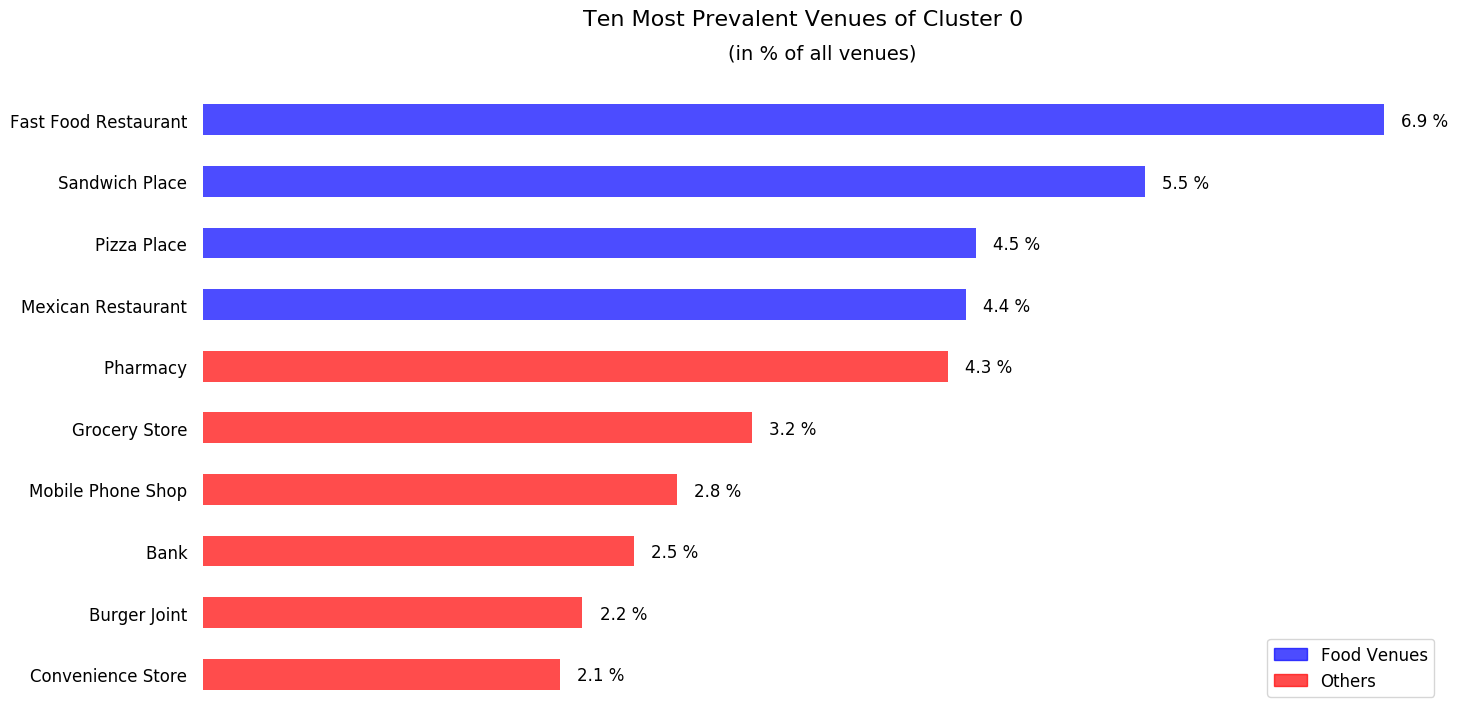

In [83]:
cluster0=pd.DataFrame(la_results.iloc[0,0:-1]).transpose()
cluster0.sort_values(by='Cluster 0',axis=1,ascending=False,inplace=True)
display(cluster0)

clus0=cluster0.iloc[0,9::-1]
generate_plot(clus0,0)

There are 6 food venues in the top 10 venues of Cluster 0 with Mexican Restaurants making up nearly 20% of all venues. These facts indicate that Cluster 0 would not be the best one to explore further in terms of setting up a new restaurant.


#### *Cluster 1*

Coffee Shop  Mexican Restaurant  Sushi Restaurant      Café  \
Cluster 1     0.042698            0.031629          0.022418  0.021575   

           Thai Restaurant  Pizza Place  Italian Restaurant  \
Cluster 1          0.02084     0.018678            0.018353   

           Convenience Store      Bar  Sandwich Place  Food Truck      Park  \
Cluster 1           0.018187  0.01789        0.016274    0.015467  0.015274   

           American Restaurant  Grocery Store  Chinese Restaurant    Bakery  \
Cluster 1              0.01508       0.013991            0.013956  0.013873   

              Hotel  Art Gallery       Gym  Ice Cream Shop  Taco Place  \
Cluster 1  0.013642     0.013276  0.013056        0.012269    0.012115   

           Burger Joint  Japanese Restaurant  Gym / Fitness Center  \
Cluster 1      0.011961              0.01132              0.010961   

           Restaurant  Asian Restaurant  Clothing Store  Pet Store  \
Cluster 1    0.010735          0.010376        0.009965    0.00992   

           Cosmetics Shop  Breakfast Spot  Donut Shop  Video Store  \
Cluster 1        0.009348         0.00832    0.008233      0.00817   

           Vegetarian / Vegan Restaurant  Mediterranean Restaurant  \
Cluster 1                        0.00807                  0.008055   

           Fast Food Restaurant       Spa      Bank  Arts & Crafts Store  \
Cluster 1               0.00805  0.007878  0.007829             0.007695   

           Deli / Bodega  Middle Eastern Restaurant     Trail  Supermarket  \
Cluster 1        0.00767                   0.007668  0.007628     0.007432   

           Music Venue  New American Restaurant  Boutique  Smoke Shop  \
Cluster 1     0.007227                 0.007056  0.006968    0.006787   

           Furniture / Home Store   Theater  French Restaurant  Yoga Studio  \
Cluster 1                0.006534  0.006486           0.006399     0.006361   

           Gastropub  Seafood Restaurant  Vietnamese Restaurant  Juice Bar  \
Cluster 1   0.006313            0.006312               0.006252   0.006165   

           Pharmacy  Rental Car Location    Lounge  Farmers Market  \
Cluster 1  0.006148             0.006131  0.006012        0.005925   

           Liquor Store  Salon / Barbershop  Cocktail Bar  \
Cluster 1      0.005772            0.005612      0.005541   

           Thrift / Vintage Store  Shipping Store  Bookstore  Hot Dog Joint  \
Cluster 1                0.005443        0.004854   0.004552       0.004256   

           Historic Site  Gift Shop  Steakhouse  Movie Theater  Wine Bar  \
Cluster 1       0.004217   0.004165    0.004019          0.004  0.003973   

           Bus Station  Fried Chicken Joint  Indian Restaurant  \
Cluster 1     0.003846             0.003783           0.003721   

           Ramen Restaurant  Flower Shop  Dessert Shop  \
Cluster 1          0.003679     0.003657      0.003603   

           Residential Building (Apartment / Condo)  Rock Club  \
Cluster 1                                  0.003465   0.003456   

           Department Store  Poke Place  Speakeasy  Discount Store   Gay Bar  \
Cluster 1          0.003446    0.003405    0.00335        0.003324  0.003276   

           Intersection   Brewery  Basketball Court  Hookah Bar    Museum  \
Cluster 1      0.003238  0.003177          0.003163    0.003163  0.003162   

           BBQ Joint  Sports Bar  Massage Studio     Plaza  Shopping Mall  \
Cluster 1   0.003077    0.003063        0.002985  0.002956        0.00294   

           Art Museum  Mobile Phone Shop  Concert Hall  \
Cluster 1    0.002928           0.002915      0.002903   

           Construction & Landscaping  Bubble Tea Shop    Market  \
Cluster 1                    0.002898         0.002895  0.002872   

           Baseball Stadium  Latin American Restaurant     Diner  \
Cluster 1          0.002734                   0.002732  0.002646   

           Cajun / Creole Restaurant  Gas Station  Shoe Store  Noodle House  \
Cluster 1                   0.0

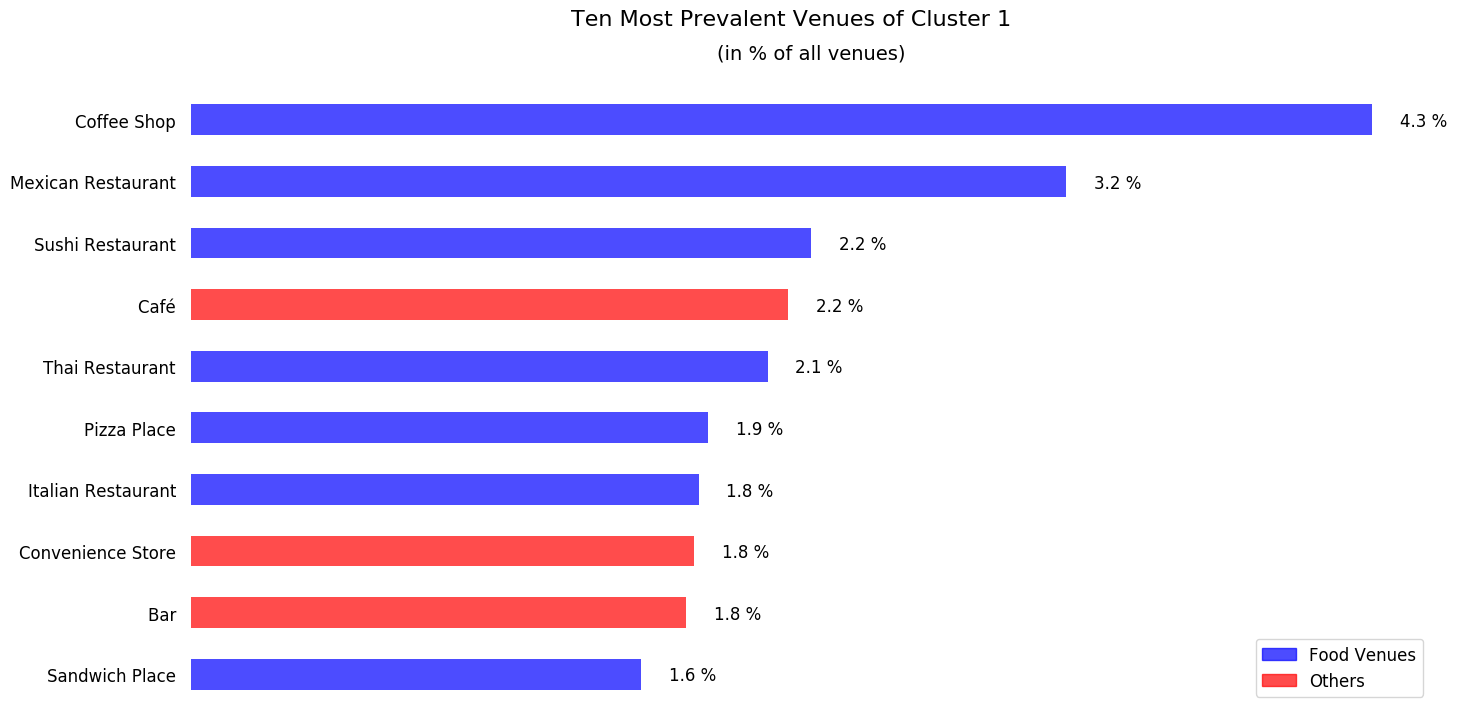

In [48]:
cluster1=pd.DataFrame(la_results.iloc[1,0:-1]).transpose()
cluster1.sort_values(by='Cluster 1',axis=1,ascending=False,inplace=True)
display(cluster1)

clus1=cluster1.iloc[0,9::-1]
generate_plot(clus1,1)

There are 4 food venues in the top 10 venues of Cluster 1 with Korean Restaurants making up a huge majority (nearly 30%) of all venues. This is unsurprising as Cluster 1 consists of only two neighbourhoods, one being Koreatown and the other (Mid-Wilshire) also having a lot of Korean Restaurants. While there are only 4 food venues in the top 10, the complete dominance of Korean Restaurants in the area indicates the fact that Cluster 1 need not be looked into any further.

#### *Cluster 2*

Intersection  Food Truck  Movie Theater  Korean Restaurant  \
Cluster 2      0.272727    0.181818       0.090909           0.090909   

               Park       Gym  Indie Movie Theater  American Restaurant  \
Cluster 2  0.090909  0.090909             0.090909             0.090909   

           Japanese Restaurant  Pharmacy  Performing Arts Venue  \
Cluster 2                  0.0       0.0                    0.0   

           Indonesian Restaurant  Paper / Office Supplies Store  \
Cluster 2                    0.0                            0.0   

           Other Repair Shop  Other Great Outdoors  Organic Grocery  \
Cluster 2                0.0                   0.0              0.0   

           Optical Shop  Opera House  Office  North Indian Restaurant  \
Cluster 2           0.0          0.0     0.0                      0.0   

           Noodle House  Nightclub  New American Restaurant  Neighborhood  \
Cluster 2           0.0        0.0                      0.0           0.0   

           Pet Store  Photography Studio  Music Venue  Piano Bar  Pie Shop  \
Cluster 2        0.0                 0.0          0.0        0.0       0.0   

           Pizza Place  Playground  Plaza  Poke Place  Pool  Pool Hall  Pub  \
Cluster 2          0.0         0.0    0.0         0.0   0.0        0.0  0.0   

           Public Art  Ramen Restaurant  Record Shop  Recording Studio  \
Cluster 2         0.0               0.0          0.0               0.0   

           Recreation Center  Nail Salon  Insurance Office  Jazz Club  \
Cluster 2                0.0         0.0               0.0        0.0   

           Laundromat  Locksmith  Liquor Store  Lingerie Store  \
Cluster 2         0.0        0.0           0.0             0.0   

           Light Rail Station  Library  Laundry Service  \
Cluster 2                 0.0      0.0              0.0   

           Latin American Restaurant  Music Store  Kosher Restaurant  \
Cluster 2                        0.0          0.0                0.0   

           Italian Restaurant  Kids Store  Karaoke Bar  Juice Bar  \
Cluster 2                 0.0         0.0          0.0        0.0   

           Jewelry Store  Lounge  Marijuana Dispensary  Market  \
Cluster 2            0.0     0.0                   0.0     0.0   

           Martial Arts Dojo  Massage Studio  Mediterranean Restaurant  \
Cluster 2                0.0             0.0                       0.0   

           Men's Store  Mexican Restaurant  Middle Eastern Restaurant  \
Cluster 2          0.0                 0.0                        0.0   

           Miscellaneous Shop  Mobile Phone Shop  Monument / Landmark  \
Cluster 2                 0.0                0.0                  0.0   

           Moroccan Restaurant  Motel  Rental Car Location  Multiplex  Museum  \
Cluster 2                  0.0    0.0                  0.0        0.0     0.0   

           ATM  Restaurant  Apartment / Condo  Train  Toy / Game Store  \
Cluster 2  0.0         0.0                0.0    0.0               0.0   

           Tiki Bar  Thrift / Vintage Store  Theme Park  Theater  \
Cluster 2       0.0                     0.0         0.0      0.0   

           Thai Restaurant  Tex-Mex Restaurant  Tea Room  Tattoo Parlor  \
Cluster 2              0.0                 0.0       0.0            0.0   

           Tanning Salon  Taiwanese Restaurant  Tailor Shop  Taco Place  \
Cluster 2            0.0                   0.0          0.0         0.0   

           Szechuan Restaurant  Sushi Restaurant  Trail  Train Station  \
Cluster 2                  0.0               0.0    0.0            0.0   

           Supermarket  Transportation Service  Yoshoku Restaurant  \
Cluster 2          0.0                     0.0                 0.0   

           Yoga Studio  Women's Store  Wings Joint  Wine Shop  Wine Bar  \
Cluster 2          0.0            0.0          0.0        0.0       0.0   

           Whisky Bar  Vietnamese Restaurant  Video Store  Video Game Store  \
Clu

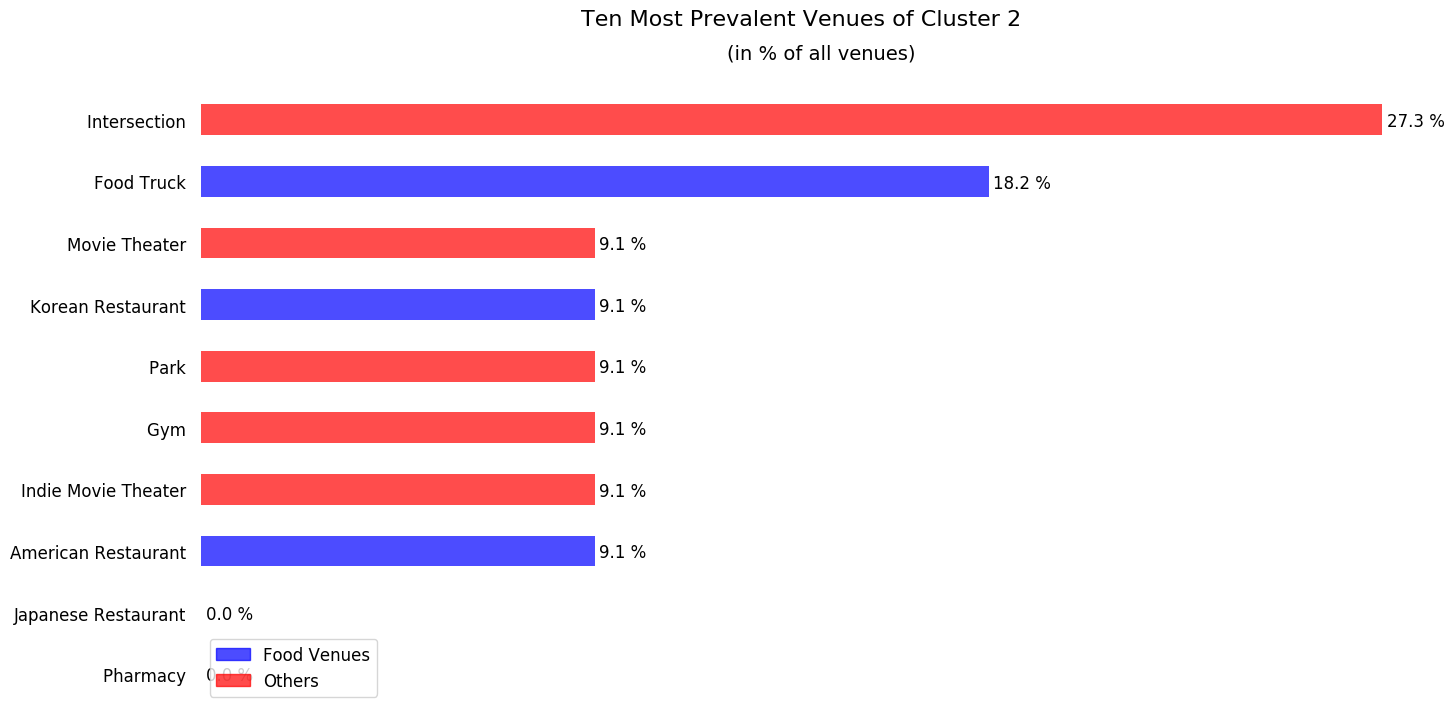

In [84]:
cluster2=pd.DataFrame(la_results.iloc[2,0:-1]).transpose()
cluster2.sort_values(by='Cluster 2',axis=1,ascending=False,inplace=True)
cluster2.rename(columns={'Residential Building (Apartment / Condo)': 'Apartment / Condo'},inplace=True)
display(cluster2)

clus2=cluster2.iloc[0,9::-1]
generate_plot(clus2,2)

There are only 2 food venues in the top 10 venues of Cluster 2. To add to that, the two venues are Food Trucks and Coffee Shops as opposed to proper restaurants. There are a lot of public venues in this cluster - venues that see a lot of footfall such as parks, museums, gyms and department stores. The presence of condominium complexes in this list also suggest that the population per square unit of these neighbourhoods is high. All of these observations point in the direction of Cluster 2 being nominated as the cluster to explore further.

Having said that, the decision to explore Cluster 2 can only be confirmed after examining Cluster 3: -

#### *Cluster 3*

Korean Restaurant      Café  Thrift / Vintage Store  \
Cluster 3           0.267662  0.070647                0.066667   

           Mexican Restaurant  Japanese Restaurant  Grocery Store  \
Cluster 3            0.066667             0.048259       0.040796   

           Discount Store  Fast Food Restaurant  Pizza Place  Gas Station  \
Cluster 3        0.033333              0.033333     0.033333     0.033333   

           Bubble Tea Shop  Ice Cream Shop  BBQ Joint  Restaurant  \
Cluster 3         0.022388        0.022388   0.014925    0.014925   

           Coffee Shop  Brazilian Restaurant  Burger Joint    Bakery  \
Cluster 3     0.014925              0.014925      0.014925  0.014925   

           Dessert Shop     Hotel  New American Restaurant  Sushi Restaurant  \
Cluster 3      0.014925  0.014925                 0.014925          0.007463   

           Convenience Store      Pool  Hotel Bar       Bar  Beer Bar  \
Cluster 3           0.007463  0.007463   0.007463  0.007463  0.007463   

           Clothing Store  Movie Theater  Speakeasy  Ramen Restaurant  \
Cluster 3        0.007463       0.007463   0.007463          0.007463   

           Juice Bar  Food Truck  Shopping Mall  Concert Hall  Smoke Shop  \
Cluster 3   0.007463    0.007463       0.007463      0.007463    0.007463   

           Karaoke Bar  Hookah Bar  Tailor Shop  Whisky Bar  Museum  \
Cluster 3     0.007463    0.007463          0.0         0.0     0.0   

           Music Store  Music Venue  Nail Salon  Neighborhood  \
Cluster 3          0.0          0.0         0.0           0.0   

           Vietnamese Restaurant  Video Store  Nightclub  Noodle House  \
Cluster 3                    0.0          0.0        0.0           0.0   

           North Indian Restaurant  Office  Opera House  Optical Shop  \
Cluster 3                      0.0     0.0          0.0           0.0   

           Organic Grocery  Other Great Outdoors  Other Repair Shop  \
Cluster 3              0.0                   0.0                0.0   

           Paper / Office Supplies Store  Video Game Store  Park  \
Cluster 3                            0.0               0.0   0.0   

           Performing Arts Venue  Pet Store  Pharmacy  Photography Studio  \
Cluster 3                    0.0        0.0       0.0                 0.0   

           Piano Bar  Pie Shop  Vegetarian / Vegan Restaurant  Playground  \
Cluster 3        0.0       0.0                            0.0         0.0   

           Vape Store  Multiplex  Wine Bar  Taco Place  Motel  Kids Store  \
Cluster 3         0.0        0.0       0.0         0.0    0.0         0.0   

           Yoshoku Restaurant  Yoga Studio  Kosher Restaurant  \
Cluster 3                 0.0          0.0                0.0   

           Latin American Restaurant  Laundromat  Laundry Service  Library  \
Cluster 3                        0.0         0.0              0.0      0.0   

           Light Rail Station  Lingerie Store  Liquor Store  Women's Store  \
Cluster 3                 0.0             0.0           0.0            0.0   

           Wings Joint  Locksmith  Lounge  Marijuana Dispensary  Market  \
Cluster 3          0.0        0.0     0.0                   0.0     0.0   

           Martial Arts Dojo  Massage Studio  Mediterranean Restaurant  \
Cluster 3                0.0             0.0                       0.0   

           Men's Store  Wine Shop  Middle Eastern Restaurant  \
Cluster 3          0.0        0.0                        0.0   

           Miscellaneous Shop  Mobile Phone Shop  Monument / Landmark  \
Cluster 3                 0.0                0.0                  0.0   

           Moroccan Restaurant  Plaza  Poke Place  Udon Restaurant  \
Cluster 3                  0.0    0.0         0.0              0.0   

           Sporting Goods Shop  Shopping Plaza  Skate Park  Theme Park  \
Cluster 3                  0.0             0.0         0.0         0.0   

           Smoothie Shop  Theater  Snack Place  Thai Restaurant 

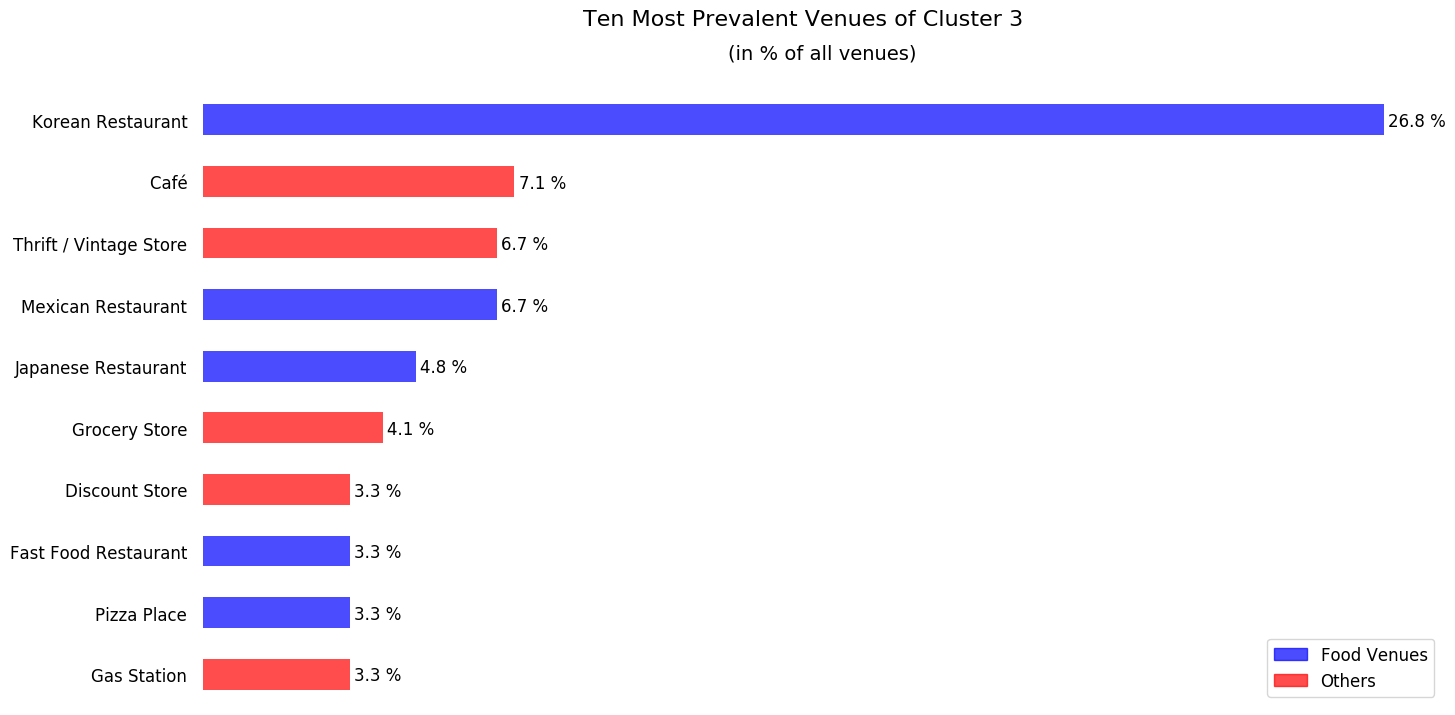

In [85]:
cluster3=pd.DataFrame(la_results.iloc[3,0:-1]).transpose()
cluster3.sort_values(by='Cluster 3',axis=1,ascending=False,inplace=True)
display(cluster3)

clus3=cluster3.iloc[0,9::-1]
generate_plot(clus3,3)

There are 8 food venues in the top 10 venues of Cluster 1 which is huge percentage. Except for the number 1 venue (Coffee Shops), all other food venues are proper restaurants. This clearly indicates that the neighbourhoods in Cluster 3 are saturated with restaurants already and need not be considered when opening a new restaurant.

It is now safe to confirm the decision of investigating **Cluster 2** further and eliminating all other clusters.

In [92]:
clus3neigh=la_merged.loc[la_merged['Cluster Label'] == 3, la_merged.columns[0]].values.tolist()
clus3neigh

['Harvard Heights', 'Koreatown']

In [93]:
filtered_nhoods=nhoods.copy()

for i in range(0,len(filtered_nhoods)):

    if filtered_nhoods.iloc[i,0] not in clus3neigh:
        filtered_nhoods.iloc[i,0]='TO DROP'

In [94]:
filtered_nhoods=filtered_nhoods[filtered_nhoods.Neighbourhood!='TO DROP']
filtered_nhoods.reset_index(drop=True,inplace=True)

The neighbourhoods in Cluster 2 along with their coordinates: -

In [95]:
filtered_nhoods

Neighbourhood   Latitude   Longitude
0  Harvard Heights  34.047111 -118.305483
1        Koreatown  34.061734 -118.305373

Function to obtain and display the closest Italian restaurants from each neighbourhood in Cluster 2 and the corresponding distances: -

In [96]:
def get_neighbourhood_Greek_Restaurant(url1):
    
    results = requests.get(url1).json()

    # assign relevant part of JSON to venues
    venues = results['response']['venues']

    # tranform venues into a data frame
    dataframe = json_normalize(venues)

    #print('DataFrame',dataframe)
    # keep only columns that include venue name, and anything that is associated with location
    filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
    #print('Filtered columns',filtered_columns)
    dataframe_filtered = dataframe.loc[:, filtered_columns]

    # filter the category for each row
    dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

    # clean column names by keeping only last term
    dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
    
    display(dataframe_filtered.loc[:,['name','categories','distance','lat','lng']])

In [97]:
category='4bf58dd8d48988d10e941735'#The category for Greek restaurants obtained from https://developer.foursquare.com/docs/resources/categories
radius = 700
LIMIT=30

In [98]:
for n in range(0,len(filtered_nhoods)):
    url = 'http://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    filtered_nhoods.iloc[n,1], 
    filtered_nhoods.iloc[n,2], 
    VERSION, 
    category, 
    radius, 
    LIMIT)
    print('------------------------------------------------- '+ filtered_nhoods.iloc[n,0] + ' -------------------------------------------------')
    get_neighbourhood_Greek_Restaurant(url)
    print('\n\n')

------------------------------------------------- Harvard Heights -------------------------------------------------


name        categories  distance  \
0  Papa Cristo's Catering & Greek Taverna  Greek Restaurant       538   
1         Ali Ranas Baklava and Gyro cart  Greek Restaurant       310   
2       Hidden LA's Big Fat Greek Tuesday  Greek Restaurant       530   

         lat         lng  
0  34.047377 -118.299649  
1  34.049600 -118.307000  
2  34.047355 -118.299735




------------------------------------------------- Koreatown -------------------------------------------------


name        categories  distance        lat         lng
0  Sizzling Kabob  Greek Restaurant       434  34.061834 -118.300668

In [101]:
filter2_nhoods=filtered_nhoods[(filtered_nhoods.Neighbourhood !='Park La Brea') & (filtered_nhoods.Neighbourhood !='Hancock Park')]
filter2_nhoods.reset_index(drop=True,inplace=True)
filter2_nhoods

Neighbourhood   Latitude   Longitude
0  Harvard Heights  34.047111 -118.305483
1        Koreatown  34.061734 -118.305373

Computing the distance of each neighbourhood from the center of LA and adding it as a column to the existing data frame: -

In [102]:
filter2_nhoods = filter2_nhoods.reindex( columns = filter2_nhoods.columns.tolist() + ['Distance from LA center (in km)'])  #this way to avoid warnings

In [103]:
from math import radians, sin, cos, acos

slat = radians(34.0536909) #LA center Latitude obtained earlier
slon = radians(-118.2427666) #LA center Longitude obtained earlier

In [104]:
for n in range(0,len(filter2_nhoods)):
    
    elat = radians(filter2_nhoods.iloc[n,1])
    elon = radians(filter2_nhoods.iloc[n,2])

    dist = 6371.01 * acos(sin(slat)*sin(elat) + cos(slat)*cos(elat)*cos(slon - elon))
    filter2_nhoods.loc[n,'Distance from LA center (in km)']=dist

In [105]:
filter2_nhoods.sort_values(by='Distance from LA center (in km)',inplace=True)
filter2_nhoods.reset_index(drop=True,inplace=True)
filter2_nhoods

Neighbourhood   Latitude   Longitude  Distance from LA center (in km)
0  Harvard Heights  34.047111 -118.305483                         5.824201
1        Koreatown  34.061734 -118.305373                         5.836395

### Web Scraping Rent Data  <a name="rent"></a>

The list of average rent of all neighbourhoods in LA can be obtained by scraping the relevant webpage. The data in the webpage is in the form of a table. Therefore, the data can be obtained much more easily.

In [106]:
url = requests.get('https://www.rentcafe.com/average-rent-market-trends/us/ca/los-angeles/').text
soup = BeautifulSoup(url,"html.parser")

In [107]:
table = soup.find('table',id="MarketTrendsAverageRentTable")
pr = table.find_all('td')
nh = table.find_all('th')

In [108]:
price = []
neighbourhood = []

for i in range(0, len(pr)):
    price.append(pr[i].text.strip())
    neighbourhood.append(nh[i+2].text.strip())
        
df_rent = pd.DataFrame(data=[neighbourhood, price]).transpose()
df_rent.columns = ['Neighbourhood', nh[1].text]
df_rent.loc[32,'Neighbourhood']='Montecito Heights' #Correcting a spelling error
df_rent

Neighbourhood Average Rent
0              Jefferson Park       $1,355
1                   El Sereno       $1,396
2               Vermont Vista       $1,445
3              Vermont Knolls       $1,445
4                   Hyde Park       $1,484
5               Glassell Park       $1,485
6                Cypress Park       $1,485
7                    Winnetka       $1,526
8                     Sunland       $1,571
9                Leimert Park       $1,575
10              Mission Hills       $1,580
11              Panorama City       $1,591
12                 Sun Valley       $1,599
13          Arlington Heights       $1,605
14               Shadow Hills       $1,607
15            Harvard Heights       $1,607
16                North Hills       $1,613
17                    Pacoima       $1,629
18                     Arleta       $1,634
19          Vermont - Slauson       $1,639
20                     Reseda       $1,678
21           Mount Washington       $1,719
22                    Tarzana       $1,736
23          Manchester Square       $1,738
24               Harvard Park       $1,738
25              Gramercy Park       $1,738
26        Chesterfield Square       $1,738
27                   Van Nuys       $1,757
28           Montecio Heights       $1,765
29   Baldwin Hills - Crenshaw       $1,780
30          Lake View Terrace       $1,793
31                 West Hills       $1,806
32          Montecito Heights       $1,815
33                Lake Balboa       $1,822
34                     Sylmar       $1,825
35                 West Adams       $1,846
36              Boyle Heights       $1,847
37             Vermont Square       $1,877
38                 South Park       $1,877
39                 Northridge       $1,894
40              Highland Park       $1,906
41                 Chatsworth       $1,907
42                Canoga Park       $1,922
43              Granada Hills       $1,926
44                 Eagle Rock       $1,947
45                  Koreatown       $1,970
46                     Encino       $2,007
47             Windsor Square       $2,014
48            Lincoln Heights       $2,016
49            North Hollywood       $2,024
50               Porter Ranch       $2,031
51                  Los Feliz       $2,060
52               Sherman Oaks       $2,062
53             East Hollywood       $2,077
54             Elysian Valley       $2,088
55                   Westlake       $2,122
56            Atwater Village       $2,138
57                  Larchmont       $2,140
58              Griffith Park       $2,180
59                   Mid-City       $2,188
60                Silver Lake       $2,198
61           Pico - Robertson       $2,247
62             Woodland Hills       $2,286
63                  Echo Park       $2,301
64                Studio City       $2,351
65            Hollywood Hills       $2,380
66             Valley Village       $2,399
67                Beverlywood       $2,400
68                Toluka Lake       $2,400
69                      Palms       $2,407
70                  Hollywood       $2,485
71               Elysian Park       $2,501
72               Hancock Park       $2,519
73       Hollywood Hills West       $2,529
74                  Chinatown       $2,530
75               Sunkist Park       $2,536
76             Studio Village       $2,536
77                  Park West       $2,536
78                  Fox Hills       $2,536
79      Blanco - Culver Crest       $2,536
80                Rancho Park       $2,605
81              Cheviot Hills       $2,605
82       Downtown Los Angeles       $2,649
83               Mid-Wilshire       $2,681
84              Playa del Rey       $2,723
85                 McLaughlin       $2,727
86                Westchester       $2,788
87                  Mar Vista       $2,809
88                  Park East       $2,830
89                  Jefferson       $2,830
90                  Clarkdale       $2,830
91                Blair Hills       $2,830
92           West

The above data frame is already in ascending order of average rent.

In [109]:
df_rent[(df_rent['Neighbourhood']=='Harvard Heights') | (df_rent['Neighbourhood']=='Korea Town')]

Neighbourhood Average Rent
15  Harvard Heights       $1,607

The average rent in **Harvard Heights** is $1610 which is comparatively much cheapear in the list. It is is also close to the center of Los Angeles